In [1]:
import itertools as itr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pn

In [2]:
def insertionSort(List):
    steps = 0
    for i in range(1,len(List)):
        temp = List[i]
        while i > 0 and temp < List[i - 1]:
            List[i] = List[i - 1]
            i = i - 1
            steps = steps + 1
        if temp == List[i]:
            steps = steps + 1
        List[i] = temp
    return steps

In [3]:
def swapp(v, i, j):
    t = v[i]
    v[i] = v[j]
    v[j] = t
    
def perm(v,i,n, Times):
    if i == n:
        Times.append(insertionSort(v.copy()))
    else:
        for j in range(i,n):
            swapp(v, i, j)
            perm(v, i + 1, n, Times)
            swapp(v, i, j)

In [4]:
def PlotDistribution(n):
    times = []
    array = np.array(range(n))
    perm(list(array), 0, n, times)
    v = np.array(sorted(list(set(times))))
    Series = plt.hist(times, len(v))
    plt.close()
    numPerm = np.array(list(Series[0]))
    plt.bar(v, numPerm)
    plt.xlabel('Complejidad de tiempo')
    plt.ylabel('Frecuencia')
    prob = numPerm*(1/numPerm.sum())
    Tabla = pn.concat([pn.Series(v, name='t'),pn.Series(prob, name='P(t)'), pn.Series(numPerm, name = 'Frequency')], axis=1)
    Resumen = pn.concat([pn.Series([v.min()], name = 'Mejor Caso'), pn.Series([v.max()], name= 'Peor Caso'), pn.Series([v.mean()], name='Caso Promedio')], axis=1)
    return [Tabla.loc[:,['t','P(t)','Frequency']], Resumen.loc[:,['Mejor Caso', 'Peor Caso', 'Caso Promedio']]]

## Distribución de la complejidad de tiempo para n = 4

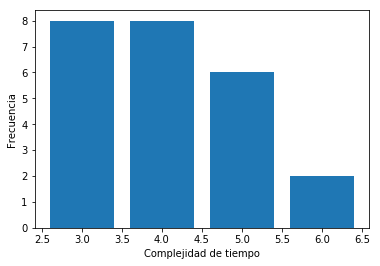

In [5]:
Result = PlotDistribution(4)

In [6]:
Result[1]

,Mejor Caso,Peor Caso,Caso Promedio
0,3,6,4.5


In [7]:
Result[0]

,t,P(t),Frequency
0,3,0.333333,8.0
1,4,0.333333,8.0
2,5,0.250000,6.0
3,6,0.083333,2.0


## Distribución de la complejidad de tiempo para n = 8

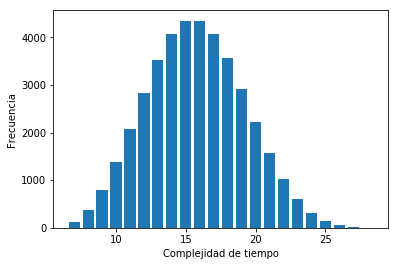

In [8]:
Result = PlotDistribution(8)

In [9]:
Result[1]

,Mejor Caso,Peor Caso,Caso Promedio
0,7,28,17.5


In [10]:
Result[0]

,t,P(t),Frequency
0,7,0.003175,128.0
1,8,0.009524,384.0
2,9,0.019841,800.0
3,10,0.034127,1376.0
4,11,0.051389,2072.0
5,12,0.070040,2824.0
6,13,0.087450,3526.0
7,14,0.100645,4058.0
8,15,0.107738,4344.0
9,16,0.107788,4346.0


## Distribución de la complejidad de tiempo para n = 12

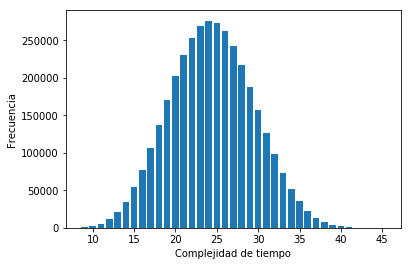

In [11]:
Result = PlotDistribution(10)

In [12]:
Result[1]

,Mejor Caso,Peor Caso,Caso Promedio
0,9,45,27.0


In [13]:
Result[0]

,t,P(t),Frequency
0,9,1.410935e-04,512.0
1,10,5.643739e-04,2048.0
2,11,1.481481e-03,5376.0
3,12,3.139330e-03,11392.0
4,13,5.784832e-03,20992.0
5,14,9.638448e-03,34976.0
6,15,1.483686e-02,53840.0
7,16,2.139991e-02,77656.0
8,17,2.917934e-02,105886.0
9,18,3.783234e-02,137286.0


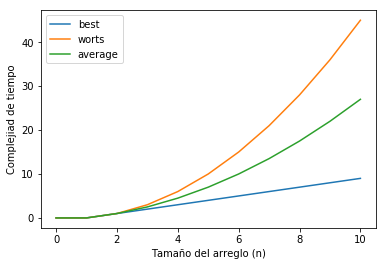

In [14]:
def complexityVsn(n):
    best = []
    worts = []
    average = []
    for i in range(n):
        returns = PlotDistribution(i)
        best.append(returns[1]['Mejor Caso'][0])
        worts.append(returns[1]['Peor Caso'][0])
        average.append(returns[1]['Caso Promedio'][0])
    plt.close()
    plt.plot(best)
    plt.plot(worts)
    plt.plot(average)
    plt.legend(['best','worts', 'average'])
    plt.xlabel('Tamaño del arreglo (n)')
    plt.ylabel('Complejiad de tiempo')
complexityVsn(11)